In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


In [2]:
df_ml = pd.read_csv("../data/final/EV_ICE_ML_READY.csv")

numeric_df = df_ml.select_dtypes(include=["int64", "float64"])

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(numeric_df)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(
    pca_components,
    columns=["Economic_Index", "Environmental_Index"]
)

df_pca.head()


,Economic_Index,Environmental_Index
0,1.288493,0.381962
1,1.288493,0.381962
2,1.288493,0.381962
3,1.556094,-0.761225
4,1.556094,-0.761225


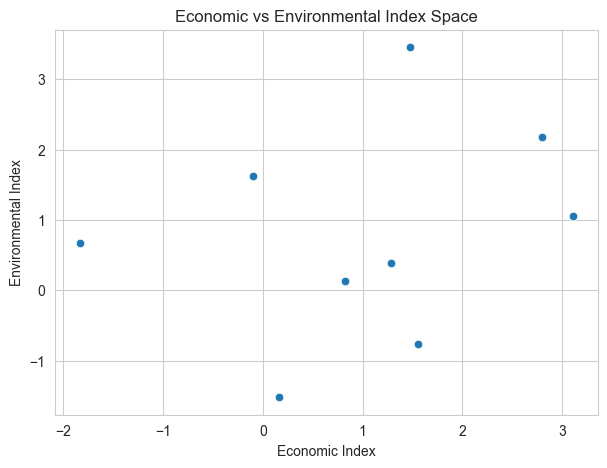

In [3]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df_pca["Economic_Index"],
    y=df_pca["Environmental_Index"]
)
plt.title("Economic vs Environmental Index Space")
plt.xlabel("Economic Index")
plt.ylabel("Environmental Index")
plt.show()


In [4]:
inertia = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)


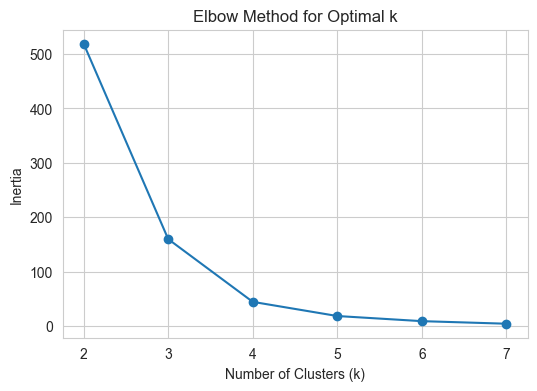

In [5]:
plt.figure(figsize=(6,4))
plt.plot(range(2, 8), inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_pca["cluster"] = kmeans.fit_predict(df_pca)


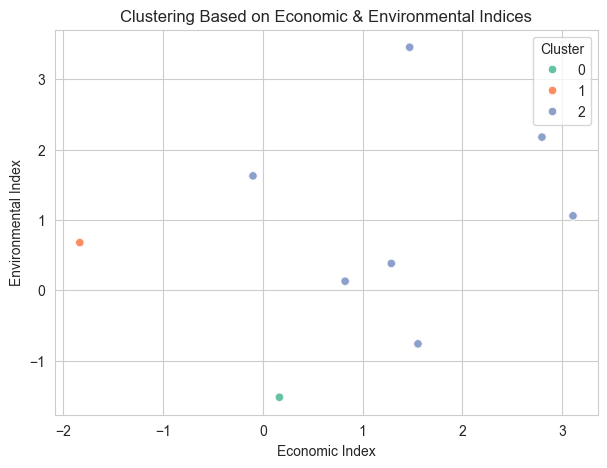

In [7]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_pca,
    x="Economic_Index",
    y="Environmental_Index",
    hue="cluster",
    palette="Set2"
)
plt.title("Clustering Based on Economic & Environmental Indices")
plt.xlabel("Economic Index")
plt.ylabel("Environmental Index")
plt.legend(title="Cluster")
plt.show()


In [8]:
df_pca.groupby("cluster").mean()


,Economic_Index,Environmental_Index
cluster,,
0,0.166482,-1.519794
1,-1.835664,0.678207
2,1.173386,0.591611
